In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

In [2]:
print("1. Gerando conjunto de dados artificial...")
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, weights=[0.75], random_state=42)

1. Gerando conjunto de dados artificial...


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
print("2. Treinando o modelo de Regressão Logística...")
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

2. Treinando o modelo de Regressão Logística...


LogisticRegression()

In [5]:
print("3. Fazendo previsões e calculando a Matriz de Confusão...")
previsoes = modelo.predict(X_test)
matriz = confusion_matrix(y_test, previsoes)

3. Fazendo previsões e calculando a Matriz de Confusão...


In [6]:
VN, FP, FN, VP = matriz.ravel()

In [7]:
print("4. Calculando as métricas...")
N = VN + FP + FN + VP
acuracia = (VP + VN) / N
sensibilidade = VP / (VP + FN) if (VP + FN) > 0 else 0
especificidade = VN / (VN + FP) if (VN + FP) > 0 else 0
precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0

4. Calculando as métricas...


In [8]:
print("\n" + "="*60)
print("RESULTADOS OBTIDOS")
print("="*60)
print(f"Matriz de Confusão (VP, FP, FN, VN):")
print(f"Verdadeiros Positivos (VP): {VP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Verdadeiros Negativos (VN): {VN}")
print(f"Total de Elementos (N): {N}")
print("-"*40)
print("MÉTRICAS CALCULADAS:")
print(f"Acurácia: {acuracia:.4f} ({acuracia*100:.2f}%)")
print(f"Sensibilidade (Recall): {sensibilidade:.4f} ({sensibilidade*100:.2f}%)")
print(f"Especificidade: {especificidade:.4f} ({especificidade*100:.2f}%)")
print(f"Precisão: {precisao:.4f} ({precisao*100:.2f}%)")
print(f"F-Score: {f_score:.4f}")
print("="*60)


RESULTADOS OBTIDOS
Matriz de Confusão (VP, FP, FN, VN):
Verdadeiros Positivos (VP): 64
Falsos Positivos (FP): 0
Falsos Negativos (FN): 16
Verdadeiros Negativos (VN): 220
Total de Elementos (N): 300
----------------------------------------
MÉTRICAS CALCULADAS:
Acurácia: 0.9467 (94.67%)
Sensibilidade (Recall): 0.8000 (80.00%)
Especificidade: 1.0000 (100.00%)
Precisão: 1.0000 (100.00%)
F-Score: 0.8889



5. Plotando a Matriz de Confusão...


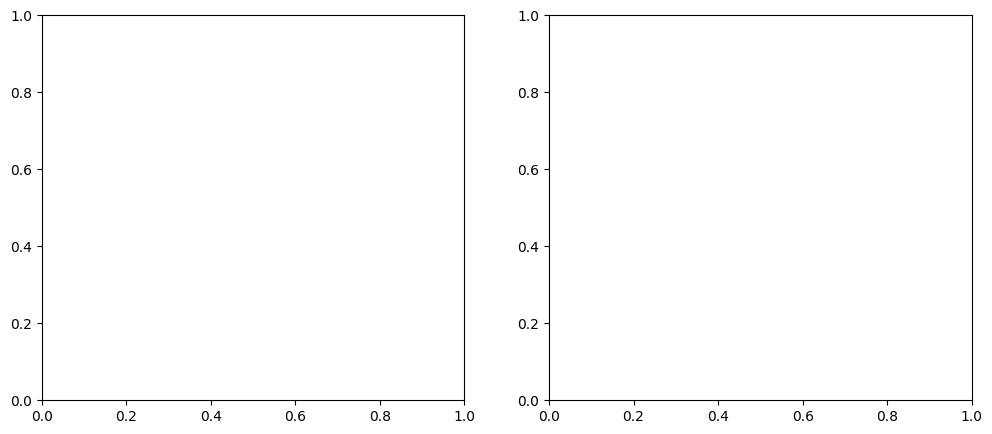

In [9]:
print("\n5. Plotando a Matriz de Confusão...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['Negativo', 'Positivo'])
disp.plot(cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusão')

Text(0.5, 1.0, 'Matriz de Confusão')

In [11]:
print("6. Calculando e plotando a Curva ROC...")
probas = modelo.predict_proba(X_test)[:, 1]

6. Calculando e plotando a Curva ROC...


In [12]:
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

In [13]:
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Linha de Base (AUC = 0.5)')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
ax2.set_ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
ax2.set_title('Curva ROC')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>